# Assignment 4

### Divija 102018056 CSBS3

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

### Load the dataset using the pandas library.

In [2]:
data = pd.read_csv('winequality-red.csv' ,sep = ';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preprocess the data if necessary (e.g., handle missing values, scale the features, etc.).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
## to check for missing values
data.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


### Split the dataset into training and testing sets. 

In [5]:
X_train, X_test = train_test_split(data, test_size=0.3)

In [6]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1083,8.7,0.42,0.45,2.4,0.072,32.0,59.0,0.99617,3.33,0.77,12.0,6
185,8.9,0.31,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7,5
966,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7
1093,9.2,0.31,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7
173,7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.99610,3.42,0.57,11.5,6


In [7]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
826,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.00,7
1128,10.0,0.43,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.00,5
472,12.5,0.37,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.40,6
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.30,6
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


### Train the decision tree classifier using the training data. 

In [20]:
classifer = DecisionTreeClassifier()
classifer.fit(X_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], X_train['quality'])

DecisionTreeClassifier()

[Text(166.63219740316902, 212.26285714285714, 'alcohol <= 10.25\ngini = 0.653\nsamples = 1119\nvalue = [7, 39, 460, 446, 150, 17]\nclass = 5'),
 Text(65.32492737676057, 201.90857142857143, 'volatile acidity <= 0.317\ngini = 0.531\nsamples = 577\nvalue = [4, 21, 352, 177, 21, 2]\nclass = 5'),
 Text(7.544788732394366, 191.5542857142857, 'total sulfur dioxide <= 79.0\ngini = 0.535\nsamples = 34\nvalue = [0, 1, 4, 22, 6, 1]\nclass = 6'),
 Text(6.287323943661972, 181.2, 'fixed acidity <= 14.65\ngini = 0.42\nsamples = 30\nvalue = [0, 1, 0, 22, 6, 1]\nclass = 6'),
 Text(5.029859154929578, 170.84571428571428, 'density <= 0.996\ngini = 0.36\nsamples = 28\nvalue = [0, 1, 0, 22, 4, 1]\nclass = 6'),
 Text(2.514929577464789, 160.49142857142857, 'free sulfur dioxide <= 14.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0]\nclass = 4'),
 Text(1.2574647887323944, 150.13714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]\nclass = 4'),
 Text(3.772394366197183, 150.13714285714286, 'gin

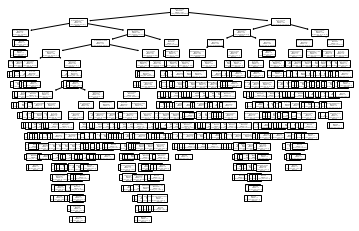

In [21]:
plot_tree(classifer, feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], class_names=['3', '4', '5', '6', '7', '8'])

### Predict the target variable for the test data using the trained classifier. 

In [22]:
Y_predict = classifer.predict(X_test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
print(Y_predict[:5])

[5 6 6 6 6]


### Evaluate the performance of the classifier using accuracy, precision, recall, and F1-score metrics. 

In [26]:
print('the accuracy score is :', accuracy_score(X_test['quality'], Y_predict))

the accuracy score is : 0.63125


In [24]:
precision_recall_fscore_support(X_test['quality'], Y_predict)

(array([0.        , 0.1875    , 0.73658537, 0.60696517, 0.50943396,
        0.        ]),
 array([0.        , 0.21428571, 0.68325792, 0.63541667, 0.55102041,
        0.        ]),
 array([0.        , 0.2       , 0.70892019, 0.62086514, 0.52941176,
        0.        ]),
 array([  3,  14, 221, 192,  49,   1], dtype=int64))